In [66]:
import pandas as pd

df = pd.read_csv('data/winequality-red.csv')

df['quality'] = (df['quality'] > 4).astype(int)

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1


In [67]:
X = df.drop('quality', axis=1)

y = df['quality']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [68]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0).fit(X_train, y_train)

lr_y_pred_train = lr.predict(X_train)

lr_y_pred_test = lr.predict(X_test)

from sklearn.tree import DecisionTreeClassifier

df = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

df_y_pred_train = df.predict(X_train)

df_y_pred_test = df.predict(X_test)

from sklearn.metrics import accuracy_score

lr_ac1 = accuracy_score(y_train, lr_y_pred_train)

lr_ac2 = accuracy_score(y_test, lr_y_pred_test)

d_ac1 = accuracy_score(y_train, df_y_pred_train)

d_ac2 = accuracy_score(y_test, df_y_pred_test)

print(lr_ac1, lr_ac2, d_ac1, d_ac2)

0.9607843137254902 0.9602272727272727 1.0 0.9166666666666666


D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=2, random_state=None, shuffle=False)

lr_param_grid = {'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10]}

df_param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 10]}

from sklearn.model_selection import GridSearchCV

lr_cv = GridSearchCV(estimator=lr, param_grid=lr_param_grid, cv=kf, scoring='accuracy')

df_cv = GridSearchCV(estimator=df, param_grid=df_param_grid, cv=kf, scoring='accuracy')

lr_cv.fit(X_train, y_train)

df_cv.fit(X_train, y_train)

lr_bestModel = lr_cv.best_estimator_

df_bestModel = df_cv.best_estimator_

lr_bestPre = lr_bestModel.predict(X_test)

df_bestPre = df_bestModel.predict(X_test)

lr_bestAcc = accuracy_score(y_test, lr_bestPre)

df_bestAcc = accuracy_score(y_test, df_bestPre)

from sklearn.metrics import recall_score

lr_bestRec = recall_score(y_test, lr_bestPre, average='macro')

df_bestRec = recall_score(y_test, df_bestPre, average='macro')

print(lr_bestAcc, df_bestAcc, lr_bestRec, df_bestRec)

0.9602272727272727 0.9640151515151515 0.5228233305156382 0.5704423781346858


D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

In [73]:
lr_pro = lr_bestModel.predict_proba(X_test)

df_pro = df_bestModel.predict_proba(X_test)

from sklearn import metrics

lr_fpr, lr_tpr, _ = metrics.roc_curve(y_test, lr_pro[:, 1])

df_fpr, df_tpr, _ = metrics.roc_curve(y_test, df_pro[:, 1])

from sklearn.metrics import auc

lr_auc = auc(lr_fpr, lr_tpr)

df_auc = auc(df_fpr, df_tpr)

print(lr_auc, df_auc)

print(lr_bestModel.coef_)

print(df_bestModel.feature_importances_)

0.7988165680473374 0.5729783037475346
[[ 0.0967364  -4.8295527  -1.96047782  0.02306966 -1.26058483 -0.02445152
   0.02511037  0.49019981 -0.59271658  0.5501708   0.56369891]]
[0.14201716 0.39103923 0.0975584  0.         0.         0.
 0.         0.         0.36938521 0.         0.        ]


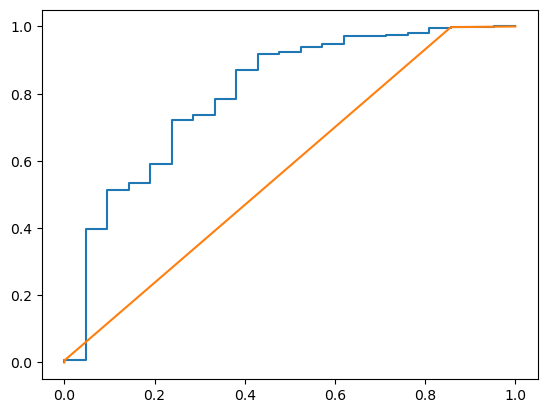

In [76]:
import matplotlib.pyplot as plt

plt.plot(lr_fpr, lr_tpr, label='Logistic Regression' % lr_auc)

plt.plot(df_fpr, df_tpr, label='Decision Tree' % df_auc)

In [77]:
print(lr_bestPre)

print(df_bestPre)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 